In [2]:
#Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Importing the Dataset 

In [3]:
#Importing the "Cancer" dataset

df = pd.read_csv("C:\\Users\\91988\\Downloads\\cancer.csv")
df

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


<span style="color:red">Understanding the Raw Dataset</span>


<span style="color:blue">1. The given Cancer dataset have 683 rows and 11 features</span>

<span style="color:blue">2. Class is the target variable </span>

<span style="color:blue">3. There are 10 predictor variables</span>

In [5]:
#Using pandas "shape" function to know the number of attributes in the dataset

df.shape

(683, 11)

### Dropping "id" Column

In [6]:
#Dropping "id" column from the dataset

df.drop("id", axis = 1, inplace= True)
df.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Checking Data type of all columns 

In [7]:
#Using pandas "dtypes" function to get the data type of all columns in the dataframe

df.dtypes

Clump Thickness      int64
UofCSize             int64
UofCShape            int64
Marginal Adhesion    int64
SECSize              int64
Bare Nuclei          int64
Bland Chromatin      int64
Normal Nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

### Checking Missing Values

In [8]:
#checking missing values in the dataset

df.isnull().sum()

Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64

## Descriptive Analysis of the Dataset 

In [9]:
#Overall Statistics of the Dataset

df.describe()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<span style="color:red">Key Statistics</span>

<span style="color:blue">1. Skewness is there in Uniformity of cell shape, Uniformity of cell size, Marginal adhesion, SEC size, Bare Nuclei and Normal Nucleoli columns</span>

<span style="color:blue">2. High standard deviation is there in Uniformity of cell shape, Bare Nuclei and Normal Nucleoli columns</span>

### Correlation 

In [10]:
#Using pandas "corr" method to know correlation among variables in the dataset

dfcorr = df.corr()
dfcorr

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
UofCSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
UofCShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
SECSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


### Visualization 

<AxesSubplot:>

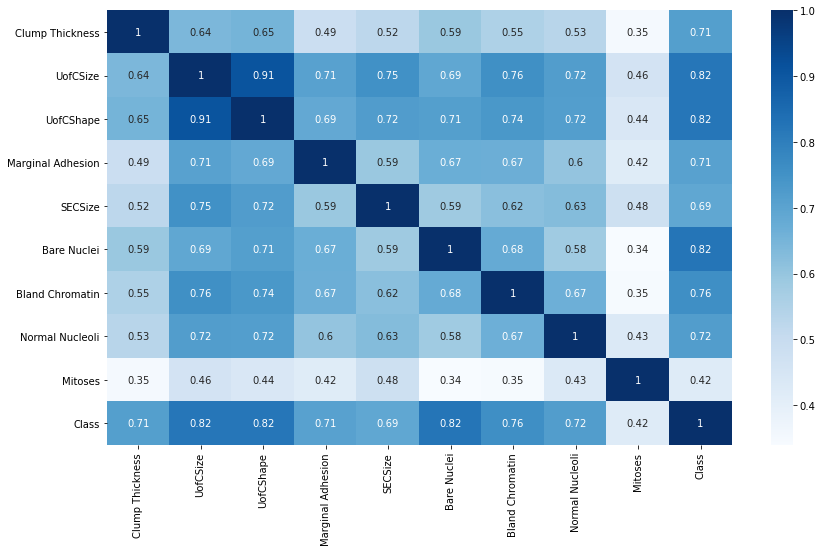

In [14]:
#Correlation Visualization

plt.figure(figsize=(14,8))
sns.heatmap(dfcorr, annot = True, cmap = "Blues")

<span style="color:blue">1. There is high correlation between uniformity of cell shape and uniformity of cell size</span>

<span style="color:blue">2. Uniformity of Cell shape, Uniformity of cell size, Bare nuclei are also highly correlated with class variable</span>

### Histogram 

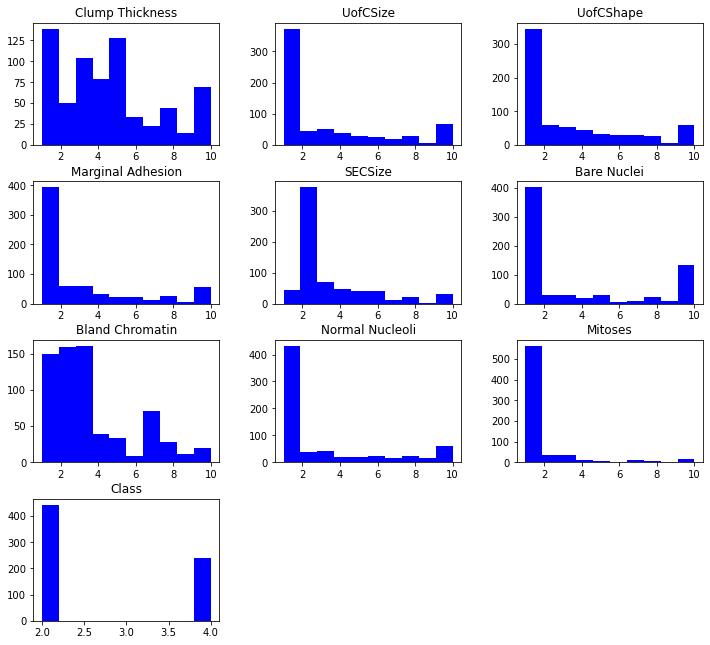

In [15]:
#Using matplotlib's "hist" function to visualize distribution of data for each column in the dataset

df.hist(figsize = (12,11), grid= False, color = "blue")
plt.show()

<span style="color:blue">Data is evenly distributed in Clump thickness</span>

<span style="color:blue">While, in other variables data is skewed to the right</span>

### Boxplot 

<AxesSubplot:>

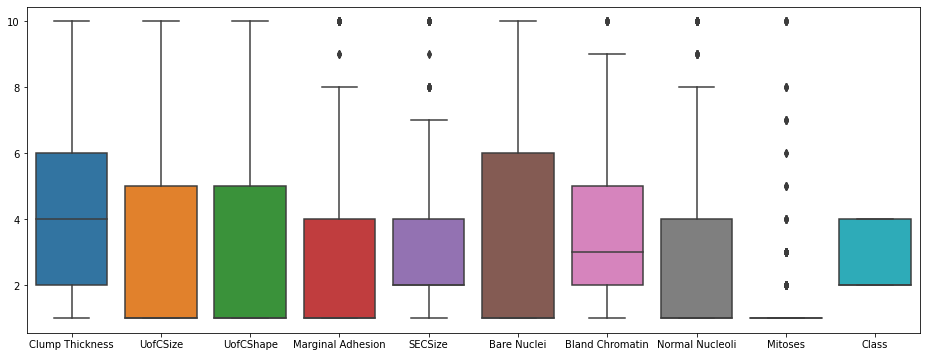

In [16]:
#Using seaborn's "boxplot" function to generate boxplot for each column in the dataset in order to find outliers

plt.figure(figsize =(16,6))
sns.boxplot(data= df)

### Data Preprocessing  

In [17]:
#Defining the variables

#defining "x" or independent variables in the dataset

x = df.drop("Class", axis = 1).to_numpy()  #using pandas "drop" attribute to drop Class column from x as it is a target variable 

#placing target variable "Class" in y variable

y = df["Class"].to_numpy() #Assigning y variable to "Class" column as it is the dependent variable in the dataset 

In [18]:
#Randomly splitting data into training and testing data using function train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, test_size=0.2,random_state=100)  

#the test_size parameter sets the proportion of data that is split into the testing set. 
#Thus, here 20% of data samples will be utilized for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 137
number of training samples: 546


In [19]:
#Using "StandardScaler" to standardize the data

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

### Model Building 

In [20]:
#Using sklearn's svm and naive_bayes libraries to create svm and naive bayes script

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))   


Estimator: SVM
[[89  0]
 [ 2 46]]
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        89
           4       1.00      0.96      0.98        48

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137


Estimator: Naive Bayes
[[86  3]
 [ 1 47]]
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



### Thank You 